# Importing Dataset From A* Search Idea (Scraped)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

df = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')
x = df['longitude']
y = df['latitude']
country = df['country']
countries = []
for i in range(len(x)):
    countries.append({'country': country[i], 'x': x[i], 'y': y[i]})
countries

df_states = df[['usa_state','usa_state_latitude','usa_state_longitude']]
df_states = df_states.dropna()
x = df_states['usa_state_longitude']
y = df_states['usa_state_latitude']
state = df_states['usa_state']
states = []
for i in range(len(x)):
    states.append({'state': state[i], 'x': x[i], 'y': y[i]})

path = []

for i in range(16):
    path.append(states[random.randint(0, len(states))])

# CNN for MNIST Fashion

In [2]:
import tensorflow as tf

# load mnist fashion dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.4477 - accuracy: 0.8375 - val_loss: 0.3398 - val_accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2989 - accuracy: 0.8913 - val_loss: 0.3034 - val_accuracy: 0.8873
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2531 - accuracy: 0.9069 - val_loss: 0.2805 - val_accuracy: 0.8961
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2206 - accuracy: 0.9184 - val_loss: 0.2834 - val_accuracy: 0.8967
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1971 - accuracy: 0.9255 - val_loss: 0.2743 - val_accuracy: 0.9026
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1708 - accuracy: 0.9370 - val_loss: 0.2633 - val_accuracy: 0.9053
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1533 - accuracy: 0.9426 - val_loss: 0.2599 -

# Looking at Test Accuracy and What Model got Wrong

313/313 [==============================] - 2s 7ms/step
10000
890
Accuracy:  0.911
Predicted:  Ankle boot


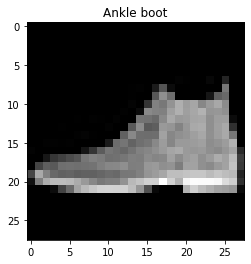

In [15]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_pred = model.predict(X_test)

def gen_false_predictions(y_pred, y_test):
    false_preds = []
    for i in range(len(y_pred)):
        if np.argmax(y_pred[i]) != y_test[i]:
            false_preds.append((i, np.argmax(y_pred[i]), y_test[i]))
    return false_preds

print(len(y_pred))
print(len(gen_false_predictions(y_pred, y_test)))

wrong = len(gen_false_predictions(y_pred, y_test))
print("Accuracy: ", ((10000 - wrong) / len(y_pred)))

plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.title(classes[y_test[0]])
print("Predicted: ", classes[np.argmax(y_pred[0])])

Predicted:  Shirt


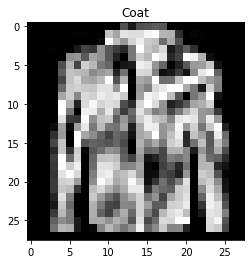

Predicted:  Sneaker


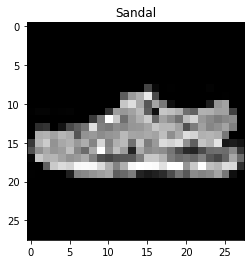

Predicted:  Sandal


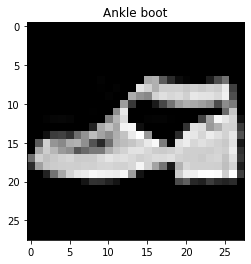

Predicted:  Shirt


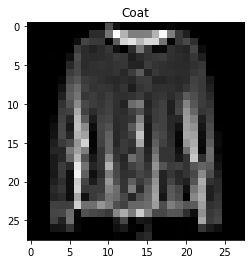

Predicted:  Shirt


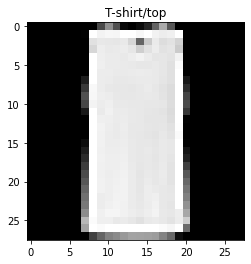

Predicted:  Shirt


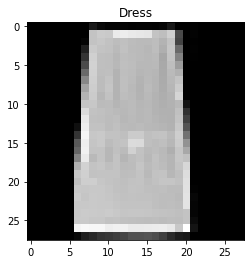

Predicted:  Shirt


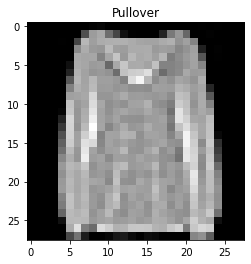

Predicted:  Shirt


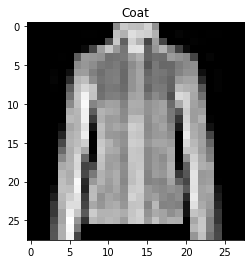

Predicted:  Coat


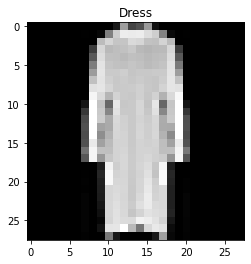

Predicted:  Sneaker


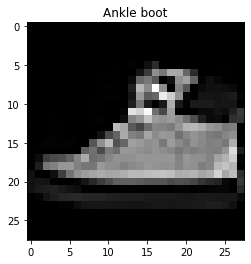

Counter({'Coat': 187,
         'Sandal': 17,
         'Ankle boot': 46,
         'T-shirt/top': 112,
         'Dress': 70,
         'Pullover': 130,
         'Shirt': 253,
         'Bag': 26,
         'Trouser': 20,
         'Sneaker': 29})

In [17]:
from collections import Counter
false_preds = gen_false_predictions(y_pred, y_test)
for i in range(10):
    plt.imshow(X_test[false_preds[i][0]].reshape(28,28), cmap="gray")
    plt.title(classes[false_preds[i][2]])
    print("Predicted: ", classes[false_preds[i][1]])
    plt.show()

wrong_class = []
for i in range(len(false_preds)):
    wrong_class.append(classes[false_preds[i][2]])

Counter(wrong_class)


# Trying SVM

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm.fit(X_train.reshape(60000, 784), y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [5]:
svc_pred = svm.predict(X_test.reshape(10000, 784))

In [6]:
print(svc_pred[0])
print(y_test[0])
print("Accuracy: ", np.sum(svc_pred == y_test) / len(y_test))

9
9
Accuracy:  0.8836
